<a href="https://colab.research.google.com/github/carlosenriquez/EJERCICIO-WS-FECHAS/blob/master/AgentePeliculas-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/AgenteBusqueda/peliculas_a.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   edad                              1807 non-null   int64
 1   year estudio                      1807 non-null   int64
 2   ciudad residencia                 1807 non-null   int64
 3   no. peliculas vistas year pasado  1807 non-null   int64
 4   Accion                            1807 non-null   int64
 5   Drama                             1807 non-null   int64
 6   Romance                           1807 non-null   int64
 7   Ciencia ficcion                   1807 non-null   int64
 8   Historica                         1807 non-null   int64
dtypes: int64(9)
memory usage: 127.2 KB


In [5]:
preferencias_por_edad = {}

lista=[['edad']]

consulta=lista[0]

In [6]:
columnas_agrupacion=consulta
agrupa=pd.DataFrame()
agrupa['Accion']=data.groupby(by=columnas_agrupacion)['Accion'].sum()
agrupa['Drama']=data.groupby(by=columnas_agrupacion)['Drama'].sum()
agrupa['Romance']=data.groupby(by=columnas_agrupacion)['Romance'].sum()
agrupa['Ciencia ficcion']=data.groupby(by=columnas_agrupacion)['Ciencia ficcion'].sum()
agrupa['Historica']=data.groupby(by=columnas_agrupacion)['Historica'].sum()
agrupa['edad'] = data.groupby(by=columnas_agrupacion).sum().index
agrupado = data.groupby(columnas_agrupacion, as_index=False).mean()

In [7]:
agrupado

,edad,year estudio,ciudad residencia,no. peliculas vistas year pasado,Accion,Drama,Romance,Ciencia ficcion,Historica
0,16,14.600000,19.050000,34.300000,3.000000,3.000000,3.000000,3.000000,3.000000
1,17,14.700000,24.350000,35.750000,3.000000,3.000000,3.000000,3.000000,3.000000
2,18,14.043478,28.913043,32.304348,3.000000,3.000000,3.000000,3.000000,3.000000
3,19,14.571429,24.500000,24.285714,3.000000,3.000000,3.000000,3.000000,3.000000
4,20,15.947368,27.157895,27.000000,3.000000,3.000000,3.000000,3.000000,3.000000
...,...,...,...,...,...,...,...,...,...
78,94,16.312500,21.500000,32.812500,0.562500,3.687500,2.062500,1.000000,2.250000
79,95,12.894737,23.210526,26.526316,0.421053,3.631579,2.684211,1.000000,2.315789
80,96,16.041667,26.666667,35.083333,0.666667,3.375000,2.208333,0.833333,2.666667
81,97,13.904762,20.666667,30.952381,0.666667,3.523810,2.761905,0.857143,2.857143


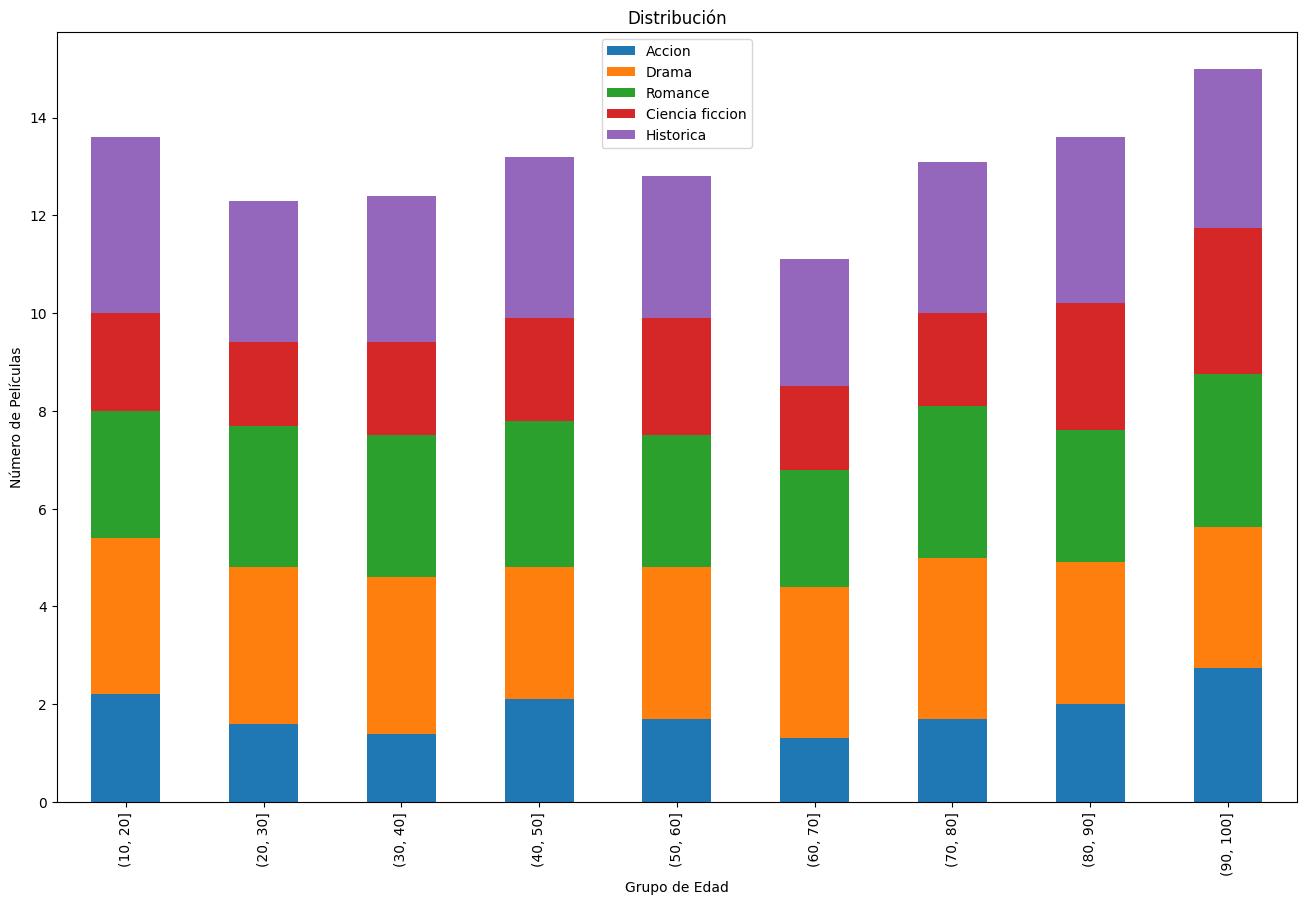

In [8]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
data_grouped = data.groupby(pd.cut(agrupado['edad'], bins=bins)).mean()

data_grouped = data_grouped[['Accion', 'Drama', 'Romance', 'Ciencia ficcion', 'Historica']]
fig, ax = plt.subplots(figsize=(16, 10))
data_grouped.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribución')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Películas')
plt.show()

In [9]:
data_grouped

,Accion,Drama,Romance,Ciencia ficcion,Historica
edad,,,,,
"(10, 20]",2.20,3.200,2.600,2.0,3.60
"(20, 30]",1.60,3.200,2.900,1.7,2.90
"(30, 40]",1.40,3.200,2.900,1.9,3.00
"(40, 50]",2.10,2.700,3.000,2.1,3.30
"(50, 60]",1.70,3.100,2.700,2.4,2.90
"(60, 70]",1.30,3.100,2.400,1.7,2.60
"(70, 80]",1.70,3.300,3.100,1.9,3.10
"(80, 90]",2.00,2.900,2.700,2.6,3.40
"(90, 100]",2.75,2.875,3.125,3.0,3.25


In [10]:
X = agrupado[['Accion','Drama','Romance','Ciencia ficcion','Historica']]
y = agrupado[['edad']]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)
y_train = np.ravel(y_train)

In [11]:

# Crear y entrenar el clasificador KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
recomendacion = knn.predict(X_test)
edades=[]
edades = agrupado['edad']

In [12]:
recomendacion = knn.predict(X_test)

In [13]:

data_grouped = data.groupby(pd.cut(data['edad'], bins=bins)).sum()
valores_dict = {}

for numero in recomendacion:
    grupo = pd.cut([numero], bins=bins)
    indice_grupo = data_grouped.index.get_loc(grupo[0])
    valores = data_grouped.iloc[indice_grupo][['Accion', 'Drama', 'Romance', 'Ciencia ficcion','Historica']]
    valores_dict[numero] = valores

print("Valores en el diccionario:")
for numero, valores in valores_dict.items():
    print(f"Para la edad de: {numero}, se sugiere: {valores.to_dict()}")

Valores en el diccionario:
Para la edad de: 16, se sugiere: {'Accion': 288, 'Drama': 288, 'Romance': 288, 'Ciencia ficcion': 288, 'Historica': 288}
Para la edad de: 71, se sugiere: {'Accion': 92, 'Drama': 714, 'Romance': 503, 'Ciencia ficcion': 188, 'Historica': 523}
Para la edad de: 72, se sugiere: {'Accion': 92, 'Drama': 714, 'Romance': 503, 'Ciencia ficcion': 188, 'Historica': 523}
Para la edad de: 31, se sugiere: {'Accion': 657, 'Drama': 483, 'Romance': 657, 'Ciencia ficcion': 756, 'Historica': 831}
Para la edad de: 40, se sugiere: {'Accion': 657, 'Drama': 483, 'Romance': 657, 'Ciencia ficcion': 756, 'Historica': 831}
Para la edad de: 45, se sugiere: {'Accion': 678, 'Drama': 561, 'Romance': 678, 'Ciencia ficcion': 744, 'Historica': 795}
Para la edad de: 49, se sugiere: {'Accion': 678, 'Drama': 561, 'Romance': 678, 'Ciencia ficcion': 744, 'Historica': 795}
Para la edad de: 80, se sugiere: {'Accion': 92, 'Drama': 714, 'Romance': 503, 'Ciencia ficcion': 188, 'Historica': 523}
Para la 

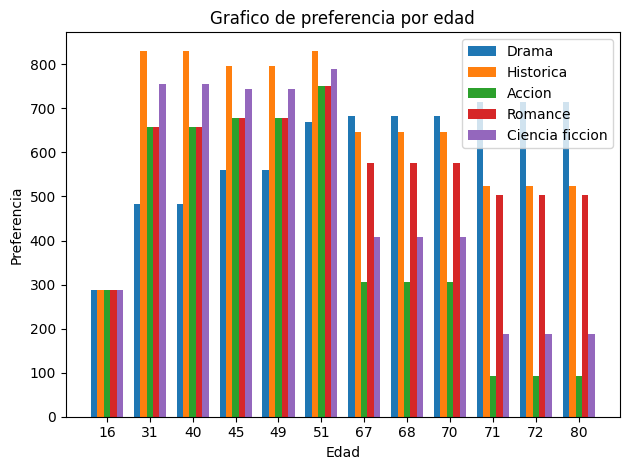

In [14]:
# Ordenar el diccionario por clave en orden ascendente
valores_ordenados = sorted(valores_dict.items())
numeros_ordenados, valores_ordenados = zip(*valores_ordenados)

# Obtener las categorías y sus valores ordenados
categorias = ['Drama', 'Historica', 'Accion', 'Romance', 'Ciencia ficcion']
valores_categorias = [[valores_dict[numero][categoria] for numero in numeros_ordenados] for categoria in categorias]

# Crear las coordenadas x para las barras
x = np.arange(len(numeros_ordenados))

# Definir el ancho de las barras
bar_width = 0.15

# Crear las barras para cada categoría
for i, categoria in enumerate(categorias):
    plt.bar(x + i * bar_width, valores_categorias[i], width=bar_width, label=categoria)

# Personalizar el gráfico
plt.title('Grafico de preferencia por edad')
plt.xlabel('Edad')
plt.ylabel('Preferencia')
plt.legend()
plt.xticks(x + bar_width * 2, numeros_ordenados)  # Ajustar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño del gráfico para evitar solapamiento
plt.show()

In [15]:
edadVistas=data
edadVistas

,edad,year estudio,ciudad residencia,no. peliculas vistas year pasado,Accion,Drama,Romance,Ciencia ficcion,Historica
0,92,18,16,38,1,4,2,0,4
1,24,14,41,49,3,3,3,3,3
2,51,25,41,46,3,2,3,3,4
3,91,23,23,46,1,4,2,1,4
4,28,19,7,36,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
1802,22,18,35,43,3,3,3,3,3
1803,37,11,44,5,3,3,3,3,3
1804,27,13,26,12,3,3,3,3,3
1805,38,12,38,37,3,3,3,3,3


In [16]:
columnas_agrupacion = ['no. peliculas vistas year pasado']  # Puedes definir aquí las columnas de agrupación que necesites

agrupa2 = pd.DataFrame()

agrupa2['edad'] = agrupado.groupby(columnas_agrupacion)['edad'].mean()
agrupa2['no. peliculas vistas year pasado'] = agrupado.groupby(columnas_agrupacion)['no. peliculas vistas year pasado'].mean()
agrupa2['Drama'] = agrupado.groupby(columnas_agrupacion)['Drama'].mean()
agrupa2['Historica'] = agrupado.groupby(columnas_agrupacion)['Historica'].mean()
agrupa2['Accion'] = agrupado.groupby(columnas_agrupacion)['Accion'].mean()
agrupa2['Romance'] = agrupado.groupby(columnas_agrupacion)['Romance'].mean()
agrupa2['Ciencia ficcion'] = agrupado.groupby(columnas_agrupacion)['Ciencia ficcion'].mean()




In [17]:

agrupa2 = agrupa2.drop_duplicates().reset_index(drop=True)

¿Personas en función de sus preferencias de películas?


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Extraer las características y la variable objetivo
X = agrupa2[['Accion', 'Drama', 'Romance', 'Ciencia ficcion', 'Historica']]
y = agrupa2[['edad', 'no. peliculas vistas year pasado']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Entrenar el modelo KNN
knn_classifier = KNeighborsRegressor(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predecir las preferencias de películas para las nuevas combinaciones de datos
predicciones = knn_classifier.predict(X_test)

# Imprimir las predicciones

# Imprimir las predicciones
print("Predicciones de preferencias de películas:")
for i in range(len(X_test)):
    print("Para las características de películas {}: {}".format(X_test.iloc[i], predicciones[i]) )

In [31]:
X_test.iloc[1]

Accion             3.000000
Drama              2.500000
Romance            3.000000
Ciencia ficcion    3.363636
Historica          3.500000
Name: 0, dtype: float64

In [50]:
print(predicciones[1])



print(predicciones[1,:1])


[45.8        33.29550679]
[45.8]
